In [2]:
#Import Libraries
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Importing the dataset
data = "the_news_headline_labeled_data.csv"
news_headlines = pd.read_csv(data)

In [4]:
news_headlines.head()

,TEXT,LABEL
0,"b""Mexican presidential front-runner hits back ...",Negative
1,"b""Cramer reflects on how Trump's actions are f...",Positive
2,b'The Wall Street Journal: Peter Thiels VC fir...,Positive
3,"b'WSJ Wealth Adviser Briefing: Catchy Tickers,...",Even
4,b'Apple proved that it is no longer just an iP...,Even


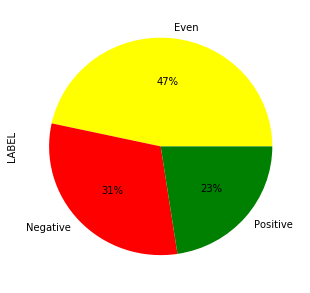

In [39]:
# Plotting Label Pie chart 
plot_size = plt.rcParams["figure.figsize"]

plot_size[0] = 5
plot_size[1] = 5
plt.rcParams["figure.figsize"] = plot_size

news_headlines.LABEL.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["yellow", "red", "green"])

In [6]:
#Creating feature and label set
features = news_headlines.iloc[:,0].values
labels = news_headlines.iloc[:, 1].values

In [40]:
#Pre-processing and cleaning the dataset using regular expressions
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [8]:
# Transforming labels strings to categorical integers and splitting the dataset into training and test sets without conversion 
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

Validation_split = 0.2

num_validation_samples = int(Validation_split * np.asarray(processed_features).shape[0])

x_train = processed_features[:-num_validation_samples]
x_test = processed_features[-num_validation_samples:]
Y_train = lb_make.fit_transform(labels[:-num_validation_samples])
Y_test = lb_make.fit_transform(labels[-num_validation_samples:])

In [9]:
#Learning Embeddings 
# Tokenizing sentences using Keras  
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(processed_feature)

#Determining number of words in largest sentence and vocabulary size of the corpus
max_length = max([len(sentence.split()) for sentence in processed_feature])

vocab_size = len(tokenizer_obj.word_index) + 1


C:\Users\Oladimeji\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [10]:
#Converting sentences in train and test sets to sequences
x_train_tokens = tokenizer_obj.texts_to_sequences(x_train)
x_test_tokens = tokenizer_obj.texts_to_sequences(x_test)

#Padding to make sure all the vectors are the same length 
x_train_pad = pad_sequences(x_train_tokens, maxlen= max_length, padding= 'post')
x_test_pad = pad_sequences(x_test_tokens, maxlen= max_length, padding= 'post')

In [11]:
# importing libraries for deep neural network
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Embedding, LSTM, GRU
from tensorflow.python.keras.layers.embeddings import Embedding

EMBEDDING_DIM = 100

print('Build model...')

#Defining neural network using embedding layer as hidden layer with random weights initialized.
model = Sequential()
model.add(Embedding(vocab_size, EMBEDDING_DIM, input_length = max_length))
model.add(GRU(units=32, dropout= 0.2, recurrent_dropout= 0.2))
model.add(Dense(1, activation= 'relu'))

model.compile(loss= 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Build model...
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
#model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1, 100)            2300      
_________________________________________________________________
gru (GRU)                    (None, 32)                12768     
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 15,101
Trainable params: 15,101
Non-trainable params: 0
_________________________________________________________________


In [13]:
#Training the model on the training set and cross-validating on test set 
model.fit(x_train_pad, Y_train, batch_size=64, epochs= 25, validation_data=(x_test_pad, Y_test), verbose=2)

Train on 800 samples, validate on 200 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/25
 - 6s - loss: 2.4403 - acc: 0.4625 - val_loss: 1.4831 - val_acc: 0.4800
Epoch 2/25
 - 0s - loss: 1.4438 - acc: 0.4625 - val_loss: 1.1728 - val_acc: 0.4800
Epoch 3/25
 - 0s - loss: 1.1795 - acc: 0.4625 - val_loss: 0.9872 - val_acc: 0.4800
Epoch 4/25
 - 0s - loss: 0.9898 - acc: 0.4625 - val_loss: 0.8452 - val_acc: 0.4800
Epoch 5/25
 - 0s - loss: 0.8273 - acc: 0.4550 - val_loss: 0.7384 - val_acc: 0.4800
Epoch 6/25
 - 0s - loss: 0.7373 - acc: 0.3150 - val_loss: 0.6629 - val_acc: 0.3200
Epoch 7/25
 - 0s - loss: 0.6486 - acc: 0.3038 - val_loss: 0.6295 - val_acc: 0.3350
Epoch 8/25
 - 0s - loss: 0.6013 - acc: 0.3038 - val_loss: 0.6199 - val_acc: 0.3350
Epoch 9/25
 - 0s - loss: 0.6002 - acc: 0.3050 - val_loss: 0.6168 - val_acc: 0.3350
Epoch 10/25
 - 0s - loss: 0.5779 - acc: 0.3050 - val_loss: 0.6024 - val_acc: 0.3350
Epoch 11/25
 - 0s - loss: 0.5756 - acc: 0.3050 - val_loss: 0.5930 - val_acc

In [14]:
#Trying to improve using word2vec model. It separately learns word embeddings and then passes to the embedding layer
#importing word tokenize and stopwords from nltk library
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

headlines = list()
lines = list(processed_features)

#Creating word tokens, removing stopwords and listing the tokens
for line in lines:
    tokens = word_tokenize(line)
    stop_words = set(stopwords.words('english'))
    words = [word for word in tokens if not word in stop_words]
    headlines.append(words)

In [15]:
#Importing gensim to create embeddings
import gensim

#Creating model through Gensim's Word2Vec API and initializing parameters
model_gen = gensim.models.Word2Vec(sentences= headlines, size= EMBEDDING_DIM, window= 5, workers= 4, min_count= 1)

#Creating vocabulary list
vocabulary = list(model_gen.wv.vocab)

C:\Users\Oladimeji\Anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


In [16]:
print("The Word2Vec Vocabulary size is:", len(vocabulary))

The Word2Vec Vocabulary size is: 3392


In [17]:
#Testing for synonyms in the embedding
model_gen.wv.most_similar('mexican')

[('frills', 0.349689781665802),
 ('age', 0.3082854449748993),
 ('handling', 0.3033483326435089),
 ('31', 0.29810279607772827),
 ('assistant', 0.29647305607795715),
 ('make', 0.28357571363449097),
 ('cocktail', 0.2736015319824219),
 ('heist', 0.27144578099250793),
 ('advantage', 0.2681414783000946),
 ('administration', 0.2663113474845886)]

In [18]:
#Saving the model for use
filename = 'news_headlines_embedding_word2vec.txt'
model_gen.wv.save_word2vec_format(filename, binary= False)

In [19]:
# Importing the word2vec model 
import os 

embeddings_index = {}
file = open(os.path.join('', 'news_headlines_embedding_word2vec.txt'), encoding= "utf-8")

#Creating coefficients for the first word in the sentence
for line in file:
    values = line.split()
    word = values[0]
    coefs = np.array(values[1:])
    embeddings_index[word] = coefs
file.close()

In [20]:
#Converting word embeddings into tokenized vector
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(headlines)
sequences = tokenizer_obj.texts_to_sequences(headlines)

#padding sequences
word_index = tokenizer_obj.word_index
print('Found %s unique tokens.' % len(word_index))

headline_pad = pad_sequences(sequences, maxlen= max_length)
print('Shape of headline Tensor:', headline_pad.shape)
print('Shape of label:', labels.shape)

Found 3392 unique tokens.
Shape of headline Tensor: (1000, 1)
Shape of label: (1000,)


In [21]:
#Mapping embedding from the word2vec model for each word to the vocabulary and creating a mtrix with word vectors
num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))

for word, i in word_index.items():
    if i > num_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        #words not found in the embedding index will be all-zeros
        embedding_matrix[i] = embedding_vector

print(num_words)

3393


In [22]:
from tensorflow.python.keras.initializers import Constant

#Defining model and using the embeddding  matrix as input to the embedding layer
model = Sequential()
embedding_layer = Embedding(num_words,
                           EMBEDDING_DIM,
                           embeddings_initializer= Constant(embedding_matrix),
                           input_length= max_length,
                           trainable= False)#Setting trainable as false since the embedding is already learned
model.add(embedding_layer)
model.add(GRU(units=32, dropout= 0.2, recurrent_dropout= 0.2))
model.add(Dense(1, activation= 'relu'))

#Setting model parameters
model.compile(loss= 'binary_crossentropy', optimizer= 'adam', metrics= ['accuracy'])

In [25]:
#Model summary with pre-trained embedding
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1, 100)            339300    
_________________________________________________________________
gru_1 (GRU)                  (None, 32)                12768     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 352,101
Trainable params: 12,801
Non-trainable params: 339,300
_________________________________________________________________


In [26]:
#Splitting the data into a training and a validtion set 
from sklearn.model_selection import train_test_split

Y = lb_make.fit_transform(labels)

X_train_pad_gen, X_test_pad_gen, y_train_gen, y_test_gen = train_test_split(headline_pad, Y, test_size=0.2, random_state=0)

In [27]:
print('Train...')
#Training the classification model
model.fit(X_train_pad_gen, y_train_gen, batch_size= 128, epochs= 25, validation_data=(X_test_pad_gen, y_test_gen), verbose= 2)

Train...
Train on 800 samples, validate on 200 samples
Epoch 1/25
 - 5s - loss: 4.4837 - acc: 0.4588 - val_loss: 2.7425 - val_acc: 0.4950
Epoch 2/25
 - 0s - loss: 2.6295 - acc: 0.4588 - val_loss: 2.3825 - val_acc: 0.4950
Epoch 3/25
 - 0s - loss: 2.3391 - acc: 0.4588 - val_loss: 2.1967 - val_acc: 0.4950
Epoch 4/25
 - 0s - loss: 2.1793 - acc: 0.4588 - val_loss: 2.0726 - val_acc: 0.4950
Epoch 5/25
 - 0s - loss: 2.0675 - acc: 0.4588 - val_loss: 1.9774 - val_acc: 0.4950
Epoch 6/25
 - 0s - loss: 1.9769 - acc: 0.4588 - val_loss: 1.8988 - val_acc: 0.4950
Epoch 7/25
 - 0s - loss: 1.9012 - acc: 0.4588 - val_loss: 1.8292 - val_acc: 0.4950
Epoch 8/25
 - 0s - loss: 1.8314 - acc: 0.4588 - val_loss: 1.7659 - val_acc: 0.4950
Epoch 9/25
 - 0s - loss: 1.7688 - acc: 0.4588 - val_loss: 1.7072 - val_acc: 0.4950
Epoch 10/25
 - 0s - loss: 1.7108 - acc: 0.4588 - val_loss: 1.6516 - val_acc: 0.4950
Epoch 11/25
 - 0s - loss: 1.6547 - acc: 0.4588 - val_loss: 1.5994 - val_acc: 0.4950
Epoch 12/25
 - 0s - loss: 1.60

In [31]:
#Importing TweetTokenizer and TfidfVectorizer using n-gram approach
from nltk import TweetTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

tokenizer = TweetTokenizer()
vectorizer = TfidfVectorizer(ngram_range = (1, 3), max_df= 0.75, min_df = 5, tokenizer= tokenizer.tokenize)

full_text = list(processed_feature)
vectorizer.fit(full_text)
#Vectorizing the input feature training set 
train_vectorized = vectorizer.transform(x_train)
test_vectorized = vectorizer.transform(x_test)

In [32]:
#Importing several classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import model_selection, naive_bayes, svm

#Specifying parameters for the classifiers
logreg = LogisticRegression(class_weight= 'balanced')
ovr = OneVsRestClassifier(logreg)
SVM = svm.SVC(C= 1.0, kernel= 'linear', degree = 3, gamma = 'auto')
naive = naive_bayes.MultinomialNB()
random_forest = RandomForestClassifier(n_estimators=300, random_state=2)

text_classifier = [ovr, SVM, naive, random_forest]

#Printing Cross-validation and test accuracy to determine better classifier.
for clf in text_classifier:
    clf.fit(train_vectorized, Y_train)
    prediction = clf.predict(test_vectorized)
    print(('{} \n\n Cross-validation mean accuracy: {}').format(clf, np.mean(cross_val_score(clf, train_vectorized, Y_train, cv=3, scoring = "accuracy"))))
    print(' Accuracy on Test set: {}'.format(accuracy_score(prediction, Y_test)))
    print('----------------------------------------------------------------------------------------')


C:\Users\Oladimeji\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
          n_jobs=1) 

 Cross-validation mean accuracy: 0.47120600007481395
 Accuracy on Test set: 0.49
----------------------------------------------------------------------------------------
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) 

 Cross-validation mean accuracy: 0.4624995324131224
 Accuracy on Test set: 0.49
----------------------------------------------------------------------------------------
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) 

 Cross-validation mean accuracy: 0.45748700108

In [33]:
#Trying a new approach using max_features and transforming the vectorized features into an array
vectorizer = TfidfVectorizer(max_features=2500, min_df=10, max_df=0.8, stop_words=stopwords.words('english'))
processed_features_transformed = vectorizer.fit_transform(processed_features).toarray()

In [34]:
#Splitting the vectorized features array and label encoded labels into training and test sets
X_train, X_test, y_train, y_test = train_test_split(processed_features_transformed, labels, test_size=0.2, random_state=2)

In [35]:
#Determining the best classifier
for clf in text_classifier:
    clf.fit(X_train, y_train)
    prediction = clf.predict(X_test)
    print(('{} \n\n Cross-validation mean accuracy: {}').format(clf, np.mean(cross_val_score(clf, X_train, y_train, cv=3, scoring = "accuracy"))))
    print(' Accuracy on Test set: {}'.format(accuracy_score(prediction, y_test)))
    print('\n Classification Report: \n{}'.format(classification_report(prediction, y_test)))
    print('----------------------------------------------------------------------------------------')


OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
          n_jobs=1) 

 Cross-validation mean accuracy: 0.5037500467586877
 Accuracy on Test set: 0.53

 Classification Report: 
             precision    recall  f1-score   support

       Even       0.57      0.57      0.57        87
   Negative       0.46      0.49      0.47        57
   Positive       0.54      0.50      0.52        56

avg / total       0.53      0.53      0.53       200

----------------------------------------------------------------------------------------
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, 